# Visualizing The Gender Gap In College Degrees

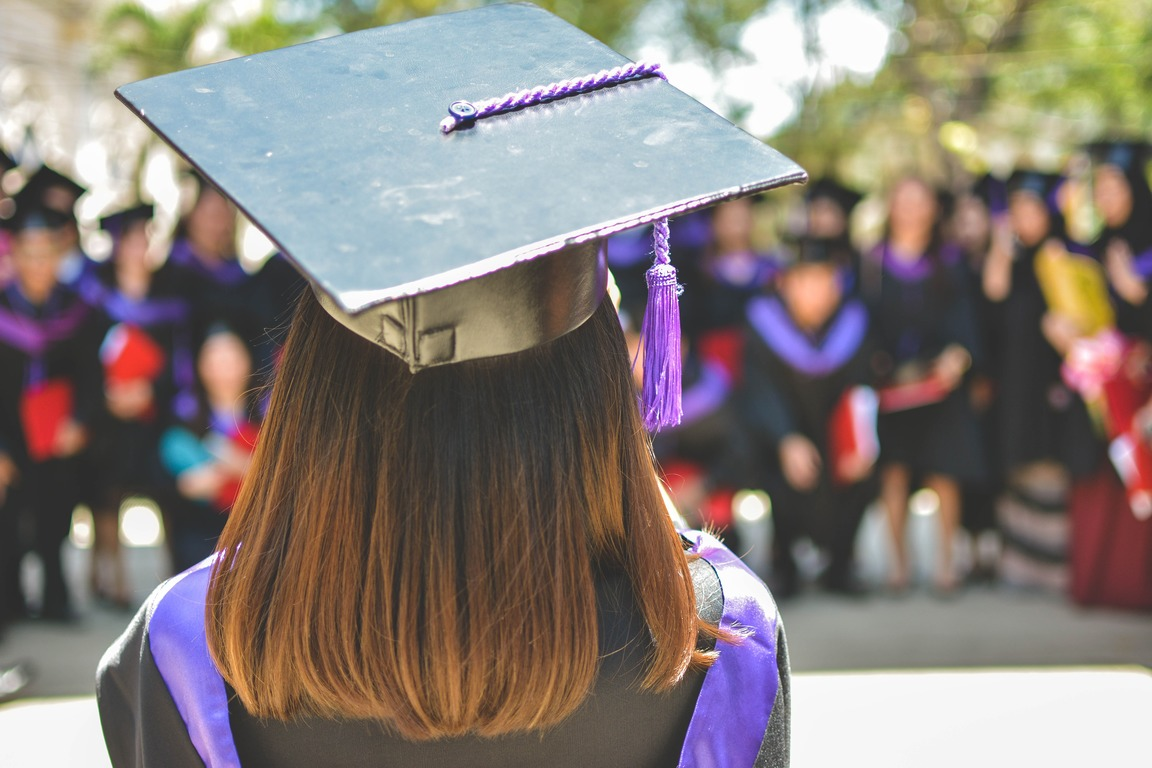

## Introduction
The goal of this project is to generate line charts with a maximized data-ink ratio to visualize the gender gap across all college degree categories granted to men and women from 1970 to 2012.

The dataset we're going to use was compiled by Randal Olson, a data scientist at the University of Pennsylvania, based on an annual dataset released by The Department of Education Statistics that contains the percentage of bachelor's degrees granted to women from 1970 to 2012. The dataset is broken up into 17 categories of degrees, with each column as a separate category, and can be found [here](http://www.randalolson.com/2014/06/14/percentage-of-bachelors-degrees-conferred-to-women-by-major-1970-2012/).
## Data Visualization
### Comparing STEM Categories
First, let's visualize the gender gap for STEM (science, technology, engineering, and mathematics) degree categories awarded from 1972 to 2012:

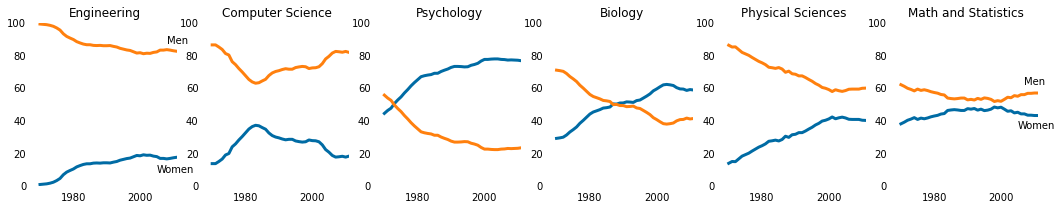

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

# Defining color-blindness-friendly colors from the Color Blind 10 palette
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

# Creating a list of the STEM categories ordered by decreasing ending gender gap
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

def add_plot():
    '''Generates line plots for men and women for the selected category'''
    ax.plot(women_degrees['Year'], women_degrees[cat], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[cat], c=cb_orange, label='Men', linewidth=3)
    ax.set_title(cat)

def add_annotations(sp1, sp2, y1, y2, y3, y4):
    '''Adds annotations on the selected subplots'''
    if sp == sp1:
        ax.text(2008, y1, 'Men')
        ax.text(2005, y2, 'Women')
    elif sp == sp2:
        ax.text(2007, y3, 'Men')
        ax.text(2005, y4, 'Women')
        ax.tick_params(labelbottom='on') 

fig = plt.figure(figsize=(18, 3))

# Creating a layout of a single row with 6 columns
for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)

    # Creating line charts of STEM categories for men and women from 1972 to 2012
    cat = stem_cats[sp]
    add_plot()

    # Setting the same limits to all charts
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)

    # Removing chartjunk
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    sns.despine(bottom=True, left=True)

    # Adding text annotations to the rightmost and leftmost charts
    add_annotations(0, 5, 87, 8, 62, 35)

plt.show()

We can make the following observations:

- The biggest gender gap is observed for the Engineering category, with  the percentage of men strongly dominating. It tends to decrease in the last 40 years of the given period, but still remains considerable.
- For Computer Science - the same big gap with men dominating. At around 1985 the gap started rapidly decreasing, which was soon followed by a comparably rapid increase.
- For Psychology category - initially, the percentages of men and women were almost equal. Soon the percentage of women started rapidly growing, reaching a gap of almost 60% in 2012.
- The Biology category is characterized by changing the sign of the gender gap: initially, men were dominating, then at around 1990 the situation changed, and by 2012 we observe the domination of women in this sphere.
- For Physical Sciences the gender gap decreased a lot in the last 40 years, reaching 20% by 2012, with men dominating.
- The smallest gender gap we see for Math and Statistics category, with men slightly dominating.

### Comparing All Categories
For comparing across all the 17 categories, we can group them into STEM, liberal arts, and other categories, ordering each list in descending order by the % of degrees awarded to women. 

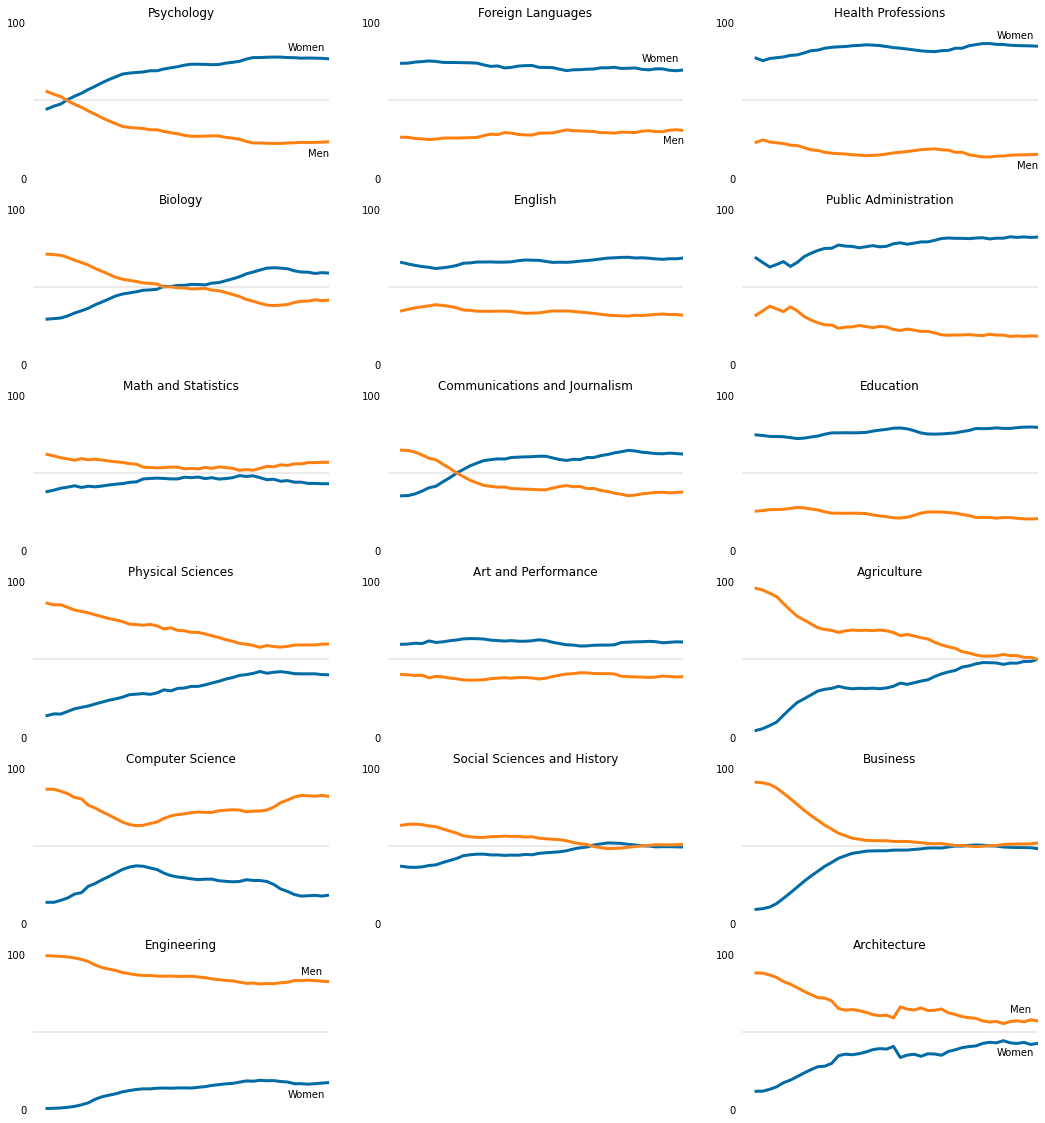

In [83]:
# Creating and reversing the lists for groups of the categories ordered by decreasing the % of degrees awarded to women
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering'][::-1]
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History'][::-1]
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture'][::-1]

fig = plt.figure(figsize=(18, 20))

for sp in range(1,19):
    ax = fig.add_subplot(6,3,sp)
    if sp in list(range(1,17,3)):        # STEM column
        cat = stem_cats.pop()
        add_plot()
        add_annotations(1, 16, 14, 82, 87, 8)
    elif sp in list(range(2,15,3)):      # Liberal Arts column
        cat = lib_arts_cats.pop()
        add_plot()
        add_annotations(2, 0, 22, 75, 0, 0)
    elif sp in list(range(3,21,3)):      # Other cats column
        cat = other_cats.pop()
        add_plot()
        add_annotations(3, 18, 6, 90, 63, 35)

    if sp!=17:
        # Setting the same limits to all charts
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)

        # Generating a horizontal line across the charts to display the 50-50 gender breakdown
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

        # Removing chartjunk 
        ax.set_yticks([0,100]) 
        sns.despine(bottom=True, left=True)
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    else:
        # Removing axes ticks from the empty subplot
        ax.set_xticks([])
        ax.set_yticks([])

# Exporting the figure to a file
plt.savefig('gender_degrees.png')
plt.show()

- For *Health Professions*, *Education*, *Foreign Languages*, *English*, *Art & Performance*, we see almost a stable gender gap for the whole period in consideration, with women dominating.
- *Computer Science* and *Engineering* categories are strongly dominated by men.
- *Biology*, *Psychology*, and *Communications & Journalism* categories are characterized by changing the sign of the gender gap: from men to women dominating.
- *Public Administration* was always dominated by women, and at some point, this gap increased even more.
- For *Math & Statistics*, there is a rather small gender gap, with a slight domination of men.
- For *Physical Sciences* and *Architecture* there is a clear trend of decreasing the gender gap, while initially these categories were dominated by men.
- For *Social Sciences & History*, *Agriculture*, and *Business*, being originally dominated by men, we observe a perfect collapse of the gender gap.

## Conclusion
In this project, we traced the gender gap evolution across 17 college degree categories from 1970 to 2012. Below are the main insights:
- For some categories, the gender gap, either large or small, is rather stable, and exists historically, be it men-dominated spheres (such as *Engineering*) or women-dominated ones (such as *Foreign Languages*). Such a gap doesn't necessarily mean any  kind of discrimination. It could actually be a question of a natural preferred choice of men and women.
- *Biology*, *Psychology*, and *Communications & Journalism* demonstrated a curious switch of the gender gap from men- to women-dominated.
- Some spheres, initially dominated by men, showed an evident trend of decreasing the gender gap, up to reaching gender equality (such as *Agriculture* and *Business*).